# Chapter I

This is the code for the chapter I of the book

## How to represent text for AI

문장을 단어 단위로 분리하고 중복 제거 후 정렬해 어휘집(vocabulary)을 만든 뒤, 각 단어를 one-hot 벡터로 변환하는 함수입니다.
one-hot 인코딩은 각 단어를 어휘집 크기만큼의 0 벡터로 만들고 해당 단어 위치만 1로 표시하는 방식으로, 예를 들어 어휘집이 ['a', 'do', 'go']일 때 'go'는 [0, 0, 1]로 표현됩니다.
반환값은 (문장 길이 × 어휘집 크기) 행렬과 어휘집 리스트이며, 단어 간 유사도나 관계를 표현하지 못하는 희소한(sparse) 표현 방식입니다.

### 원-핫 인코딩

In [1]:
import numpy as np

In [ ]:
def one_hot_encoding(sentence):
    words = sentence.lower().split() # .split()은 공백 기준이라 restaurant?를 하나로 봐
    vocabulary = sorted(set(words)) # set(words)로 중복 제거, sorted()로 알파벳 순 정렬
    word_to_index = {word: i for i, word in enumerate(vocabulary)} 
    #enumerate()는 리스트 같은 거 순회할 때, 인덱스, 값 쌍을 만들어줌 [(0, vocabulary[0]), (1, vocabulary[1]), (2, vocabulary[2]), ...]
    # {word: i for i, word in enumerate(vocabulary)}는 루프를 돌면서 word를 key, i를 value로 하는 딕셔너리 생성 (딕셔너리 컴프리헨션)
    # 딕셔너리 예시: {'a': 0, 'do': 1, 'go': 2, 'or': 3, 'pizzeria': 4, 'prefer': 5, 'restaurant?': 6, 'should': 7, 'to': 8, 'we': 9, 'you': 10} 
    one_hot_matrix = np.zeros((len(words), len(vocabulary)), dtype=int) 
    # 영벡터 생성, 행(단어 수/중복 고려), 열(고유 단어 수/ 중복 제거)
    for i, word in enumerate(words):
        one_hot_matrix[i, word_to_index[word]] = 1 # 만들어둔 배열에서 i번쨰를 i로 1로 바꿔

    return one_hot_matrix, vocabulary # 여기서 2개 반환하니까 밑에 one_hot_matrix, vocabulary로 받아야 함   

# Example of usage
sentence = "Should we go to a pizzeria or do you a prefer a restaurant?"
one_hot_matrix, vocabulary = one_hot_encoding(sentence)
print("Vocabulary:", vocabulary)
print("One-Hot Encoding Matrix:\n", one_hot_matrix)

Vocabulary: ['a', 'do', 'go', 'or', 'pizzeria', 'prefer', 'restaurant?', 'should', 'to', 'we', 'you']
One-Hot Encoding Matrix:
 [[0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]]


### 단어 가방

여러 문장(문서)을 입력받아 전체 어휘집을 만들고, 각 문서에서 단어가 몇 번 등장하는지 카운트하는 단어 가방(Bag-of-Words) 행렬을 생성하는 함수입니다.

One-hot 인코딩과 달리 단어의 출현 빈도를 저장하므로, 예를 들어 "awesome"이 2번 나오면 해당 위치에 2가 기록되며, 문서의 전체 단어 순서는 무시하고 빈도만 고려합니다.

반환값은 전체 어휘집과 (문서 개수 × 어휘집 크기) 행렬이며, 단어 빈도 정보를 유지하지만 여전히 단어 간 의미 관계는 표현하지 못합니다.재시도

In [3]:
def bag_of_words(sentences):
    """
    Creates a bag-of-words representation of a list of documents.
    """
    tokenized_sentences = [sentence.lower().split() for sentence in sentences] # corpus 보면 문장이 3개라 리스트 3개 각각 시행
    flat_words = [word for sublist in tokenized_sentences for word in sublist] 
    # 쉽다 for이 두개면 왼쪽부터 해석하고
    # for sublist in tokenized_sentences로 문장을 하나씩 꺼내고
    # for word in sublist로 단어를 하나씩 꺼내서
    # flat_words에 다 넣어줌
    # ["this","movie","is","awesome","awesome","awesome?","only","a","fool"]

    vocabulary = sorted(set(flat_words)) # 중복없이 알파벳순 정렬
    word_to_index = {word: i for i, word in enumerate(vocabulary)}

    bow_matrix = np.zeros((len(sentences), len(vocabulary)), dtype=int)
    for i, sentence in enumerate(tokenized_sentences):
        for word in sentence:
            if word in word_to_index:
                bow_matrix[i, word_to_index[word]] += 1

    return vocabulary, bow_matrix

# Example of usage
corpus = ["This movie is awesome awesome", "I do not say is good, but neither awesome",
             "Awesome? Only a fool can say that"]
vocabulary, bow_matrix = bag_of_words(corpus)
print("Vocabulary:", vocabulary)
print("Bag of Words Matrix:\n", bow_matrix)

Vocabulary: ['a', 'awesome', 'awesome?', 'but', 'can', 'do', 'fool', 'good,', 'i', 'is', 'movie', 'neither', 'not', 'only', 'say', 'that', 'this']
Bag of Words Matrix:
 [[0 2 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1]
 [0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0]
 [1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0]]


### TF-IDF

**compute_tf 함수:**
각 문서에서 단어의 출현 횟수를 문서 내 전체 단어 수로 나눈 단어 빈도(Term Frequency) 행렬을 계산하는 함수입니다.
Bag-of-Words(DTM)는 단어의 절대 빈도(raw count)를 저장하지만, TF는 `(단어 등장 횟수) / (문서의 전체 단어 수)`로 정규화하여 상대 빈도를 계산합니다.
예를 들어 100개 단어 문서에서 "movie" 2번 vs 10개 단어 문서에서 "movie" 2번을 비교할 때, BoW는 둘 다 2이지만 TF는 0.02 vs 0.2로 문서 길이를 고려한 공정한 비교가 가능합니다.
코드에서 `tf[i, word_index[word]] += 1 / word_count` 부분이 정규화를 수행하며, 단어가 n번 등장하면 최종적으로 `n / word_count` 값이 저장됩니다.
반환값은 (문서 개수 × 어휘집 크기) TF 행렬과 어휘집 리스트이며, 각 문서의 행 합이 1.0이 되도록 정규화됩니다.

**compute_idf 함수:**
각 단어가 전체 문서 중 몇 개 문서에 등장하는지 계산하여 역문서 빈도(Inverse Document Frequency) 벡터를 구하는 함수입니다.
DF(Document Frequency)는 특정 단어가 등장하는 문서의 개수이며, IDF는 `log(전체 문서 수 / (DF + 1)) + 1`로 계산되어 희귀한 단어일수록 높은 값을 가집니다.
예를 들어 100개 문서 중 90개에 등장하는 "is"는 낮은 IDF를, 3개 문서에만 등장하는 "Spielberg"는 높은 IDF를 가져서 중요한 키워드를 구분할 수 있습니다.
`+1 smoothing`은 분모가 0이 되는 것을 방지하고, `+1`을 마지막에 더해 모든 IDF 값이 최소 1 이상이 되도록 보장합니다.
반환값은 어휘집 크기만큼의 IDF 벡터(1차원 배열)이며, 모든 문서에 공통적으로 적용되는 단어별 가중치입니다.

**tf_idf 함수:**
`compute_tf()`와 `compute_idf()`를 순차적으로 호출한 뒤, TF 행렬과 IDF 벡터를 element-wise 곱셈하여 최종 TF-IDF 행렬을 생성하는 메인 함수입니다.
TF-IDF는 문서 내에서 자주 등장하면서(높은 TF) 동시에 전체 문서에서는 희귀한 단어(높은 IDF)에 높은 가중치를 부여하여, 해당 문서를 대표하는 핵심 키워드를 식별합니다.
예를 들어 영화 리뷰에서 모든 문서에 나오는 "movie"는 낮은 점수를, 특정 리뷰에만 나오는 감독 이름이나 배우 이름은 높은 점수를 받아 그 리뷰의 특징을 잘 드러냅니다.
반환값은 어휘집과 (문서 개수 × 어휘집 크기) TF-IDF 행렬이며, 정보 검색, 문서 분류, 추천 시스템 등에서 Bag-of-Words보다 훨씬 우수한 성능을 보입니다.

In [4]:
def compute_tf(sentences):
    """Compute the term frequency matrix for a list of sentences."""
    vocabulary = sorted(set(word for sentence in sentences for word in sentence.lower().split()))
    word_index = {word: i for i, word in enumerate(vocabulary)}
    tf = np.zeros((len(sentences), len(vocabulary)), dtype=np.float32)
    for i, sentence in enumerate(sentences):
        words = sentence.lower().split()
        word_count = len(words)
        for word in words:
            if word in word_index:
                tf[i, word_index[word]] += 1 / word_count
    return tf, vocabulary

def compute_idf(sentences, vocabulary):
    """Compute the inverse document frequency for a list of sentences."""
    num_documents = len(sentences)
    idf = np.zeros(len(vocabulary), dtype=np.float32)
    word_index = {word: i for i, word in enumerate(vocabulary)}
    for word in vocabulary:
        df = sum(1 for sentence in sentences if word in sentence.lower().split())
        idf[word_index[word]] = np.log(num_documents / (1 + df)) + 1  # Smoothing
    return idf

def tf_idf(sentences):
    """Generate a TF-IDF matrix for a list of sentences."""
    tf, vocabulary = compute_tf(sentences)
    idf = compute_idf(sentences, vocabulary)
    tf_idf_matrix = tf * idf
    return vocabulary, tf_idf_matrix

vocabulary, tf_idf_matrix = tf_idf(corpus)
print("Vocabulary:", vocabulary)
print("TF-IDF Matrix:\n", tf_idf_matrix)

Vocabulary: ['a', 'awesome', 'awesome?', 'but', 'can', 'do', 'fool', 'good,', 'i', 'is', 'movie', 'neither', 'not', 'only', 'say', 'that', 'this']
TF-IDF Matrix:
 [[0.         0.4        0.         0.         0.         0.
  0.         0.         0.         0.2        0.28109303 0.
  0.         0.         0.         0.         0.28109303]
 [0.         0.11111111 0.         0.1561628  0.         0.1561628
  0.         0.1561628  0.1561628  0.11111111 0.         0.1561628
  0.1561628  0.         0.11111111 0.         0.        ]
 [0.20078073 0.         0.20078073 0.         0.20078073 0.
  0.20078073 0.         0.         0.         0.         0.
  0.         0.20078073 0.14285715 0.20078073 0.        ]]


## Embedding, application, and representation

In [5]:
!pip install gensim adjustText

In [6]:
import numpy as np
import pandas as pd
import os
import re
import time
import nltk
from gensim.models import Word2Vec
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from adjustText import adjust_text
from umap import UMAP
nltk.download('punkt')
nltk.download('punkt_tab')

/Users/kwon/PyTorch.training/Modern-AI-Agents/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /Users/kwon/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /Users/kwon/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
#this for unzip and read the file
!wget "https://github.com/SalvatoreRa/tutorial/blob/main/datasets/IMDB.zip?raw=true" -O IMDB.zip
!unzip -o IMDB.zip

df=pd.read_csv("IMDB Dataset.csv")

--2026-01-18 16:52:14--  https://github.com/SalvatoreRa/tutorial/blob/main/datasets/IMDB.zip?raw=true
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SalvatoreRa/tutorial/raw/refs/heads/main/datasets/IMDB.zip [following]
--2026-01-18 16:52:14--  https://github.com/SalvatoreRa/tutorial/raw/refs/heads/main/datasets/IMDB.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SalvatoreRa/tutorial/refs/heads/main/datasets/IMDB.zip [following]
--2026-01-18 16:52:14--  https://raw.githubusercontent.com/SalvatoreRa/tutorial/refs/heads/main/datasets/IMDB.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.1

영화 리뷰 텍스트를 정제하는 전처리 함수로, HTML 태그 제거, 특수문자 제거, 소문자 변환, 1글자 단어 제거를 수행합니다.
`re.sub('<[^>]+>', '', review)`로 HTML 태그를 제거하고, `re.sub('[^a-zA-Z ]', '', review)`로 알파벳과 공백만 남기며, 최종적으로 2글자 이상 단어만 소문자로 변환해 공백으로 연결합니다.
전처리된 리뷰는 `reviews_processed` 컬럼에 저장되고, `nltk.word_tokenize()`로 단어 단위로 분리한 리스트를 `tokens` 컬럼에 저장하여 Word2Vec 학습에 사용할 준비를 마칩니다.

In [ ]:
def preprocessing_reviews(reviews):

    """
    simple preprocessing: splitting on the space and remove word less than 1 chr
    """

    processed_reviews = []

    for review in tqdm(reviews):
        review = re.sub('<[^>]+>', '', review)
        processed = re.sub('[^a-zA-Z ]', '', review)
        words = processed.split()
        processed_reviews.append(' '.join([word.lower() for word in words if len(word) > 1]))
    return processed_reviews

df['reviews_processed'] = preprocessing_reviews(df['review'])
df['tokens'] = df['reviews_processed'].apply(nltk.word_tokenize)
df.head()

100%|██████████| 50000/50000 [00:03<00:00, 12805.39it/s]


,review,sentiment,reviews_processed,tokens
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,wonderful little production the filming techni...,"[wonderful, little, production, the, filming, ..."
2,I thought this was a wonderful way to spend ti...,positive,thought this was wonderful way to spend time o...,"[thought, this, was, wonderful, way, to, spend..."
3,Basically there's a family where a little boy ...,negative,basically theres family where little boy jake ...,"[basically, theres, family, where, little, boy..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is vi...,"[petter, matteis, love, in, the, time, of, mon..."


전처리된 영화 리뷰 토큰 리스트로 Word2Vec 모델을 학습시키는 코드입니다.
`sg=1`은 Skip-gram 방식(주변 단어로 중심 단어 예측), `vector_size=100`은 각 단어를 100차원 벡터로 표현, `window=5`는 중심 단어 기준 양쪽 5개 단어를 문맥으로 사용, `workers=4`는 4개 CPU 코어로 병렬 처리합니다.
학습 완료 후 각 단어는 의미 공간에서 유사한 단어끼리 가까운 위치에 배치되며, 'king' - 'man' + 'woman' = 'queen' 같은 벡터 연산이 가능해지고, 학습 소요 시간을 분 단위로 출력합니다.

In [ ]:
start_time = time.time()
# embedding
model = Word2Vec(sentences=df['tokens'].tolist(),
                 sg=1,
                 vector_size=100,
                 window=5,
                 workers=4)

print(f'Time needed : {(time.time() - start_time) / 60:.2f} mins')

Time needed : 5.74 mins


Word2Vec 모델에서 학습된 모든 단어와 임베딩 벡터를 추출한 뒤, 특정 단어들(도시명, 국가명, 영화 관련 단어)을 선택해 계층적 군집화 덴드로그램으로 시각화하는 코드입니다.
`model.wv.index_to_key`로 전체 어휘를 가져오고, 강조 표시할 12개 단어의 임베딩 벡터만 추출하여 `linkage()`로 Ward 방법을 사용한 계층적 군집 분석을 수행합니다.
덴드로그램은 단어 간 유클리드 거리를 기반으로 유사한 단어끼리 먼저 묶이는 구조를 보여주며, 예를 들어 'Berlin', 'Paris', 'London' 같은 도시명끼리, 'good', 'bad' 같은 감정 단어끼리 가까운 클러스터를 형성하는 것을 시각적으로 확인할 수 있습니다.

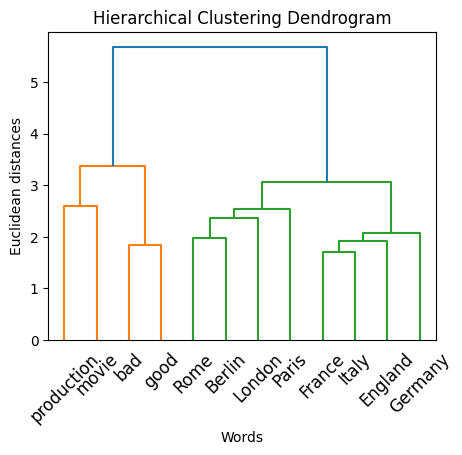

In [ ]:
# Entire set of words in the model
all_words = list(model.wv.index_to_key)
all_vectors = np.array([model.wv[word] for word in all_words])

# Highlighted words and their vectors
highlight_words = ['Berlin', 'Paris', 'London','Rome', 'Italy',
                   'France', 'Germany', 'England', 'movie', 'production', 'good', 'bad']
highs = [w.lower() for w in highlight_words]
indices = [all_words.index(word) for word in highs if word in all_words]
highlight_vectors = np.array([all_vectors[index] for index in indices])

linked = linkage(highlight_vectors, 'ward')

plt.figure(figsize=(5, 4))
dendrogram(linked,
           orientation='top',
           labels=highlight_words,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Words')
plt.ylabel('Euclidean distances')
plt.xticks(rotation=45)
plt.savefig('word_dendrogram.jpg', format='jpeg', bbox_inches='tight')
plt.show()

100차원 Word2Vec 임베딩을 t-SNE로 2차원으로 축소하여 단어 간 의미적 유사도를 평면상에 시각화하는 코드입니다.
전체 어휘는 회색 점으로 배경에 표시하고, 강조할 9개 단어(도시명, 국가명, 영화/가족 관련 단어)는 서로 다른 색상으로 크게 표시하며, `adjust_text()`로 레이블이 겹치지 않도록 자동 조정합니다.
t-SNE는 고차원에서 가까운 단어들을 2차원에서도 가깝게 배치하므로, 의미가 유사한 단어끼리 클러스터를 형성하는 것을 확인할 수 있으며, 예를 들어 'berlin', 'rome', 'France', 'Germany' 같은 지역 관련 단어들이 한 영역에 모이는 패턴을 시각적으로 볼 수 있습니다.

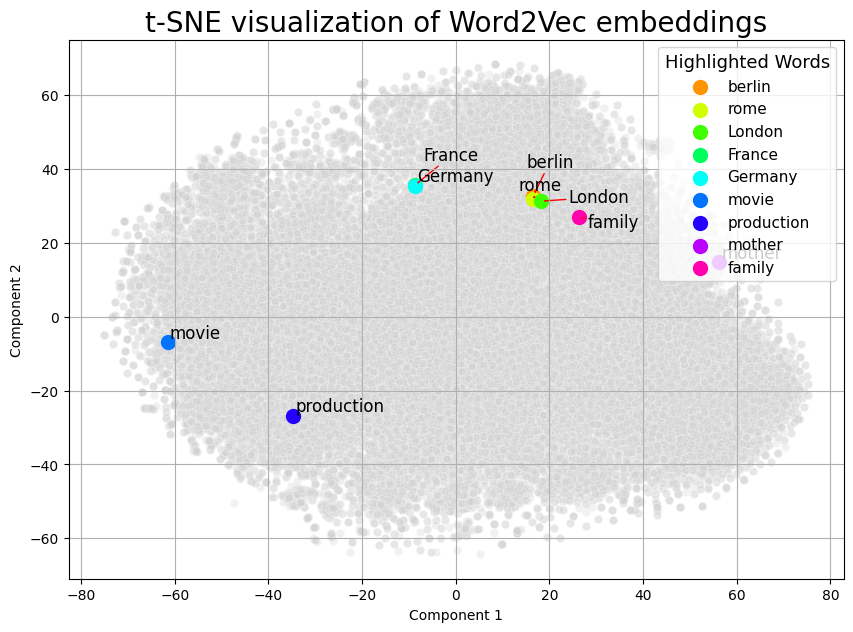

In [ ]:
# Apply t-SNE to the entire set of vectors
tsne = TSNE(n_components=2, random_state=0)
Y_tsne = tsne.fit_transform(all_vectors)

highlight_words = ['berlin', 'rome', 'London', 'France', 'Germany',
                    'movie', 'production', 'mother', 'family']

highs = [w.lower() for w in highlight_words]
indices = [all_words.index(word) for word in highs if word in all_words]
highlight_vectors = np.array([all_vectors[index] for index in indices])
Y_highlight = Y_tsne[indices]


plt.figure(figsize=(10, 7))


sns.scatterplot(x=Y_tsne[:, 0], y=Y_tsne[:, 1], color="lightgrey", alpha=0.3)

# Plot highlighted words
palette = sns.color_palette("hsv", len(highlight_words))
texts = []
for i, word in enumerate(highlight_words):
    plt.scatter(Y_highlight[i, 0], Y_highlight[i, 1], color=palette[i], s=100, label=word)
    # adjust text
    texts.append(plt.text(Y_highlight[i, 0], Y_highlight[i, 1], word, fontsize=12))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.title('t-SNE visualization of Word2Vec embeddings', fontsize=20)
plt.xlabel('Component 1')
plt.ylabel('Component 2')


plt.grid(True)
plt.legend(title='Highlighted Words', title_fontsize='13', fontsize='11')
plt.savefig('word_tsne.jpg', format='jpeg')
plt.show()

100차원 Word2Vec 임베딩을 UMAP으로 2차원으로 축소하여 단어 간 의미적 관계를 시각화하는 코드로, t-SNE와 유사하지만 다른 차원 축소 알고리즘을 사용합니다.
UMAP은 t-SNE보다 전역적 구조(global structure)를 더 잘 보존하고 계산 속도가 빠르며, 고차원 데이터의 클러스터 구조와 거리 관계를 더 정확하게 유지합니다.
시각화 방식은 t-SNE와 동일하게 전체 어휘는 회색 배경으로, 강조 단어는 색상별로 표시하며, UMAP 결과는 t-SNE보다 클러스터 간 거리가 더 의미있게 해석되고 같은 카테고리 단어들이 더 명확하게 분리되는 경향을 보입니다.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


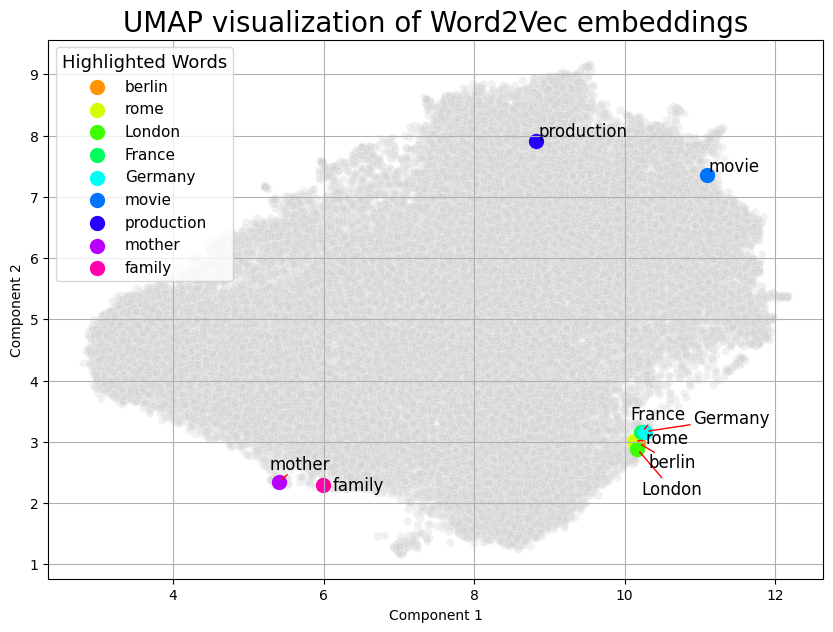

In [ ]:
# Apply UMAP to the entire set of vectors
umap = UMAP(n_components=2, random_state=42)
Y_umap = umap.fit_transform(all_vectors)

Y_highlight = Y_umap[indices]


plt.figure(figsize=(10, 7))
sns.scatterplot(x=Y_umap[:, 0], y=Y_umap[:, 1], color="lightgrey", alpha=0.3)

palette = sns.color_palette("hsv", len(highlight_words))
texts = []
for i, word in enumerate(highlight_words):
    plt.scatter(Y_highlight[i, 0], Y_highlight[i, 1], color=palette[i], s=100, label=word)

    texts.append(plt.text(Y_highlight[i, 0], Y_highlight[i, 1], word, fontsize=12))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.title('UMAP visualization of Word2Vec embeddings', fontsize=20)
plt.xlabel('Component 1')
plt.ylabel('Component 2')


plt.grid(True)
plt.legend(title='Highlighted Words', title_fontsize='13', fontsize='11')
plt.savefig('word_umap.jpg', format='jpeg')
plt.show()

두 2차원 벡터 사이의 코사인 유사도와 각도를 계산하고, 벡터와 그 사이 각도를 시각화하는 함수입니다.
코사인 유사도는 `dot_product / (norm_v1 * norm_v2)`로 계산되며 -1(정반대)에서 1(동일 방향) 사이 값을 가지고, `arccos()`로 라디안 각도를 구한 뒤 degree로 변환합니다.
`quiver()`로 원점에서 시작하는 두 벡터를 빨강/파랑 화살표로 그리고, 두 벡터 사이 각도를 초록색 호로 표시하며 θ(theta) 기호를 추가하여, 벡터 간 유사도를 각도와 코사인 값으로 동시에 이해할 수 있도록 시각화합니다.
이는 Word2Vec 임베딩에서 단어 벡터 간 유사도를 측정하는 원리를 2차원 예시로 설명하며, 실제로는 100차원 벡터에서 동일한 코사인 유사도 계산이 이루어집니다.

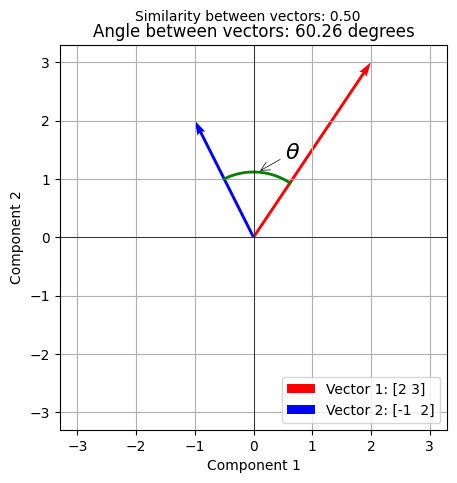

In [ ]:
def plot_vectors_and_angle(v1, v2):

    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    cosine_similarity = dot_product / (norm_v1 * norm_v2)
    angle_radians = np.arccos(cosine_similarity)
    angle_degrees = np.degrees(angle_radians)


    fig, ax = plt.subplots(figsize=(5, 5))


    ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label=f"Vector 1: {v1}")
    ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label=f"Vector 2: {v2}")


    start_angle = np.arctan2(v1[1], v1[0])
    if np.cross(v1, v2) < 0:
        angle_radians = -angle_radians


    theta = np.linspace(start_angle, start_angle + angle_radians, 100)
    r = 0.5 * min(np.linalg.norm(v1), np.linalg.norm(v2))
    x = r * np.cos(theta)
    y = r * np.sin(theta)


    ax.plot(x, y, linestyle='-', color='green', lw=2)


    midpoint = (start_angle + angle_radians / 2)
    ax.annotate(r'$\theta$', xy=(r * np.cos(midpoint), r * np.sin(midpoint)), xytext=(20, 10),
                textcoords='offset points', fontsize=16, arrowprops=dict(arrowstyle='->', lw=0.5))


    max_range = np.max(np.abs(np.vstack([v1, v2, [x.max(), y.max()]]))) * 1.1  # 10% padding
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range])


    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.title(f'Angle between vectors: {angle_degrees:.2f} degrees')
    plt.suptitle(f'Similarity between vectors: {cosine_similarity:.2f}', fontsize=10, y=.95)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(loc='lower right')
    plt.savefig('cosine_similarity.jpg', format='jpeg', bbox_inches='tight')
    plt.show()

    return cosine_similarity, angle_degrees

# Example usage
v1 = np.array([2, 3])
v2 = np.array([-1, 2])
cos_sim, angle = plot_vectors_and_angle(v1, v2)



Word2Vec 모델에서 단어 벡터 간 유사도와 벡터 연산을 테스트하는 코드입니다.
`most_similar("good")`로 "good"과 가장 유사한 상위 3개 단어를 찾고, `distance()`로 동의어("good"-"great")와 반의어("good"-"bad") 간 코사인 거리를 계산하여 동의어는 가까운 거리, 반의어는 먼 거리를 가지는지 확인합니다.
마지막으로 유명한 벡터 연산 `king - man + woman = queen`을 테스트하여, Word2Vec이 단어 간 의미적 관계(성별, 왕족 등)를 벡터 공간에서 일관된 방향으로 학습했는지 검증하며, `most_similar(positive=['king', 'woman'], negative=['man'])`로 "queen"이 결과로 나오면 성공적인 임베딩 학습을 의미합니다.

In [ ]:
word_1 = "good"
syn = "great"
ant = "bad"
most_sim =model.wv.most_similar("good")
print("Top 3 most simalr words to {} are :{}".format(word_1, most_sim[:3]))

synonyms_dist = model.wv.distance(word_1, syn)
antonyms_dist = model.wv.distance(word_1, ant)
print("Synonyms {}, {} have cosine distance: {}".format(word_1, syn, synonyms_dist))
print("Antonyms {}, {} have cosine distance: {}".format(word_1, ant, antonyms_dist))
a = 'king'
a_star = 'man'
b = 'woman'
b_star= model.wv.most_similar(positive=[a, b], negative=[a_star])
print("{} is to {} as {} is to: {} ".format(a, a_star, b, b_star[0][0]))

Top 3 most simalr words to good are :[('decent', 0.8030914068222046), ('great', 0.7821353673934937), ('bad', 0.7726691961288452)]
Synonyms good, great have cosine distance: 0.21786469221115112
Antonyms good, bad have cosine distance: 0.22733074426651
king is to man as woman is to: queen 


# RNN, LSTM, GRU, CNN for text

In [ ]:
import numpy as np
import torch
import torch.nn as nn

PyTorch의 RNN 레이어를 사용하여 순차 데이터를 처리하는 예제 코드입니다.
입력 텐서는 (batch_size=10, sequence_length=5, input_size=3) 형태이며, 10개의 샘플 각각이 5개 시간 스텝으로 구성되고 각 스텝마다 3차원 특징 벡터를 가집니다.
`nn.RNN(input_size=3, hidden_size=10, num_layers=1)`은 3차원 입력을 받아 10차원 hidden state로 변환하는 단일 레이어 RNN이며, `batch_first=True`로 배치 차원을 첫 번째로 설정합니다.
출력 shape `[10, 5, 10]`은 각 배치의 모든 시간 스텝(5개)에서 hidden state(10차원)를 반환한다는 의미이며, 텍스트 분류나 시계열 예측에서 각 시점의 문맥 정보를 활용할 수 있습니다.

In [ ]:
array = np.random.random((10, 5, 3))

data_tensor = torch.tensor(array, dtype=torch.float32)
RNN = nn.RNN(input_size=3, hidden_size=10,
                          num_layers=1, batch_first=True)
output, hidden = RNN(data_tensor)
output.shape

torch.Size([10, 5, 10])

PyTorch의 LSTM 레이어를 사용하여 순차 데이터를 처리하는 예제 코드입니다.
입력은 RNN과 동일하게 (10, 5, 3) 형태이지만, LSTM은 RNN과 달리 hidden state와 cell state 두 가지 상태를 반환하여 장기 의존성(long-term dependency) 문제를 해결합니다.
`nn.LSTM(input_size=3, hidden_size=10)`은 3차원 입력을 10차원으로 변환하며, cell state는 장기 기억을 저장하고 hidden state는 단기 출력을 담당하여 gradient vanishing 문제를 완화합니다.
출력 shape는 `[10, 5, 10]`으로 RNN과 동일하지만, LSTM은 내부적으로 forget gate, input gate, output gate를 통해 정보를 선택적으로 기억/망각하여 긴 시퀀스에서 더 나은 성능을 보입니다.

In [ ]:
data_tensor = torch.tensor(np.random.random((10, 5, 3)), dtype=torch.float32)
LSTM =nn.LSTM(input_size=3, hidden_size=10,
                    num_layers=1, batch_first=True)
output, (hidden, cell) = LSTM(data_tensor)
output.shape

torch.Size([10, 5, 10])

PyTorch의 GRU 레이어를 사용하여 순차 데이터를 처리하는 예제 코드입니다.
GRU는 LSTM의 단순화된 버전으로, cell state 없이 hidden state만 사용하며 update gate와 reset gate 두 개의 게이트로 정보를 제어합니다.
`nn.GRU(input_size=3, hidden_size=10)`은 LSTM보다 파라미터가 적어 학습 속도가 빠르고 메모리 효율적이면서도, 장기 의존성을 어느 정도 포착할 수 있어 많은 NLP 태스크에서 LSTM과 비슷한 성능을 보입니다.
출력 shape는 `[10, 5, 10]`으로 RNN/LSTM과 동일하며, 반환값이 output과 hidden만 있어(cell state 없음) LSTM보다 간단하지만 실전에서는 LSTM만큼 효과적인 경우가 많습니다.

In [ ]:
data_tensor = torch.tensor(np.random.random((10, 5, 3)), dtype=torch.float32)
GRU =nn.GRU(input_size=3, hidden_size=10,
                    num_layers=1, batch_first=True)
output, hidden = GRU(data_tensor)
output.shape

torch.Size([10, 5, 10])

PyTorch의 1D Convolution 레이어를 사용하여 시퀀스 데이터를 처리하는 예제 코드입니다.
입력 텐서 (10, 5, 3)에서 `in_channels=5`는 시퀀스 길이를 채널로 해석하고, 각 채널이 길이 3의 시퀀스를 가지며, `kernel_size=3`은 3개 연속된 값을 한번에 보는 sliding window 역할을 합니다.
`out_channels=16`은 16개의 서로 다른 필터를 적용해 16개 특징 맵을 생성하고, `padding=1`로 입력 길이를 유지하며, RNN/LSTM/GRU처럼 순차적으로 처리하지 않고 병렬로 처리해 속도가 빠릅니다.
출력 shape는 `[10, 16, 3]`이며, CNN은 텍스트에서 n-gram 패턴이나 local feature를 포착하는데 효과적이고, 감정 분석이나 문서 분류에서 RNN 대안으로 자주 사용됩니다.

In [ ]:
data_tensor = torch.tensor(np.random.random((10, 5, 3)), dtype=torch.float32)
Conv1d = nn.Conv1d(in_channels=5, out_channels=16, kernel_size=3, stride=1, padding=1)
output = Conv1d(data_tensor)
output.shape

torch.Size([10, 16, 3])

# Classify review with deep learning

아래 실습은 GPU 없이 실습할 경우 시간이 매우 오래 걸립니다.  
구글 Colab에서 실습한다면 상단의 런타임 > 런타임 유형 변경 > T4 GPU를 선택 후 실습을 진행하세요.

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string
import re
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import sys
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from wordcloud import WordCloud

is_cuda = torch.cuda.is_available()

# Check if we GPU available
if is_cuda:
    device = torch.device("cuda")
    print("Using GPU")
else:
    device = torch.device("cpu")
    print("Using CPU")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Using GPU


In [ ]:
#this for unzip and read the file
!wget https://github.com/SalvatoreRa/tutorial/blob/main/datasets/IMDB.zip?raw=true
!unzip IMDB.zip?raw=true
df=pd.read_csv("IMDB Dataset.csv")

--2025-10-15 13:19:06--  https://github.com/SalvatoreRa/tutorial/blob/main/datasets/IMDB.zip?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SalvatoreRa/tutorial/raw/refs/heads/main/datasets/IMDB.zip [following]
--2025-10-15 13:19:06--  https://github.com/SalvatoreRa/tutorial/raw/refs/heads/main/datasets/IMDB.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SalvatoreRa/tutorial/refs/heads/main/datasets/IMDB.zip [following]
--2025-10-15 13:19:06--  https://raw.githubusercontent.com/SalvatoreRa/tutorial/refs/heads/main/datasets/IMDB.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.1

IMDB 영화 리뷰 데이터셋을 로드하고 감정 분석을 위한 train/validation/test 세트로 분할하는 코드입니다.
먼저 로컬에 파일이 있으면 읽고, 없으면 GitHub에서 다운로드 및 압축 해제하며, `sentiment_encoded`로 'positive'를 0, 'negative'를 1로 인코딩합니다.
`train_test_split()`으로 전체 데이터를 train(72%) / test(20%)로 나누고, `stratify=y`로 클래스 비율을 유지하며, 다시 train을 train(64.8%) / validation(7.2%)로 분할합니다.
최종적으로 약 36,000개 train, 4,500개 validation, 9,500개 test 샘플로 나뉘며, validation set은 하이퍼파라미터 튜닝과 조기 종료(early stopping)에 사용되고 test set은 최종 모델 평가에만 사용됩니다.

In [ ]:
#this for unzip and read the file
try:
    df=pd.read_csv("IMDB Dataset.csv")
except:
    !wget https://github.com/SalvatoreRa/tutorial/blob/main/datasets/IMDB.zip?raw=true
    !unzip IMDB.zip?raw=true

df['sentiment_encoded'] = np.where(df['sentiment']=='positive',0,1)
X,y = df['review'].values, df['sentiment_encoded'].values
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y, test_size=.2)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,stratify=y_train, test_size=.1)
y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)

긍정 리뷰와 부정 리뷰에서 가장 빈번하게 등장하는 단어들을 워드 클라우드로 시각화하는 함수입니다.
먼저 sentiment로 리뷰를 분리한 뒤, `get_words()`에서 특수문자와 숫자를 제거하고 불용어(stopwords)와 1글자 단어를 필터링하여 의미있는 단어만 추출합니다.
`Counter()`로 각 단어의 출현 빈도를 계산하고, `WordCloud()`로 긍정 리뷰는 초록색, 부정 리뷰는 빨간색으로 워드 클라우드를 생성하며, 빈도가 높은 단어일수록 크게 표시됩니다.
두 개의 워드 클라우드를 나란히 배치하여 긍정/부정 리뷰에서 각각 어떤 단어가 자주 사용되는지 비교할 수 있으며, 예를 들어 긍정 리뷰에서는 "good", 부정 리뷰에서는 "bad" 같은 단어가 크게 나타날 것입니다.

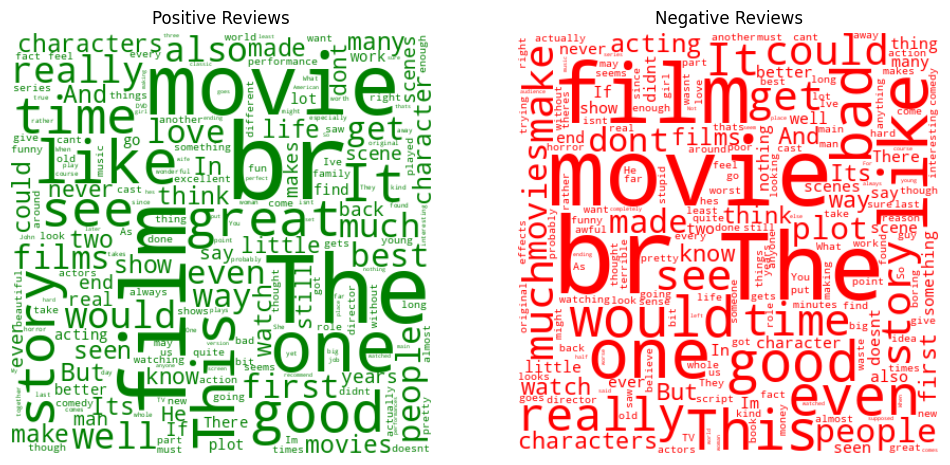

In [ ]:
def generate_wordclouds(df):
    '''
    Generate two word clouds from the 50 most frequent words in the list of positive and negative reviews respectively.

    '''
    stop_words = set(stopwords.words('english'))

    # Separating reviews by sentiment
    positive_reviews = df[df['sentiment'] == 'positive']['review']
    negative_reviews = df[df['sentiment'] == 'negative']['review']


    def get_words(reviews):
        all_words = []
        for review in reviews:
            review = re.sub(r"[^\w\s]", '', review)
            review = re.sub(r"\d", '', review)
            words = review.split()
            filtered_words = [word for word in words if word not in stop_words and len(word) > 1]
            all_words.extend(filtered_words)
        return all_words


    positive_words = get_words(positive_reviews)
    negative_words = get_words(negative_reviews)


    positive_counts = Counter(positive_words)
    negative_counts = Counter(negative_words)


    positive_wordcloud = WordCloud(
        width=400,
        height=400,
        max_words=200,
        max_font_size=100,
        background_color='white',
        color_func=lambda *args, **kwargs: "green"
    ).generate_from_frequencies(positive_counts)

    negative_wordcloud = WordCloud(
        width=400,
        height=400,
        max_words=200,
        max_font_size=100,
        background_color='white',
        color_func=lambda *args, **kwargs: "red"
    ).generate_from_frequencies(negative_counts)


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title('Positive Reviews')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.title('Negative Reviews')
    plt.axis("off")
    plt.savefig('word_clouds.jpg', format='jpeg', bbox_inches='tight')
    plt.show()

generate_wordclouds(df)


긍정 리뷰와 부정 리뷰의 길이(단어 수) 분포를 히스토그램으로 비교하고 요약 통계를 표시하는 함수입니다.
각 리뷰를 공백 기준으로 split하여 단어 개수를 계산하고, 최소값, 평균, 중앙값, 최대값을 구한 뒤 히스토그램 우측 상단에 텍스트 박스로 표시합니다.
긍정 리뷰는 초록색, 부정 리뷰는 빨간색 히스토그램으로 나란히 배치하여 두 감정 클래스 간 리뷰 길이 분포 차이를 시각적으로 비교할 수 있습니다.
이를 통해 긍정/부정 리뷰의 평균 길이가 비슷한지, 어느 쪽이 더 긴 리뷰를 작성하는 경향이 있는지 파악할 수 있으며, 나중에 RNN 입력을 위한 적절한 sequence length(padding 길이)를 결정하는데 도움이 됩니다.

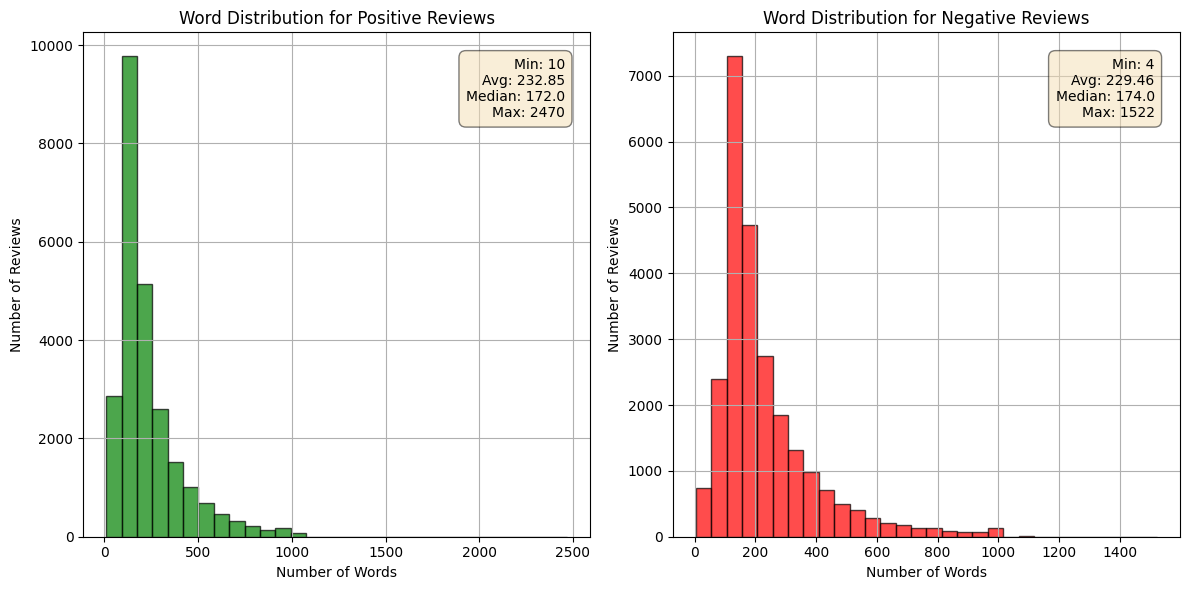

In [ ]:
def plot_review_length_by_sentiment(df):
    '''
    Plots histograms of the number of words per review for positive and negative reviews with summary statistics.

    '''

    positive_reviews = df[df['sentiment'] == 'positive']['review']
    negative_reviews = df[df['sentiment'] == 'negative']['review']


    def get_review_lengths(reviews):
        return [len(review.split()) for review in reviews]


    positive_lengths = get_review_lengths(positive_reviews)
    negative_lengths = get_review_lengths(negative_reviews)


    def get_summary_stats(lengths):
        return {
            'min': np.min(lengths),
            'avg': np.mean(lengths),
            'median': np.median(lengths),
            'max': np.max(lengths)
        }

    pos_stats = get_summary_stats(positive_lengths)
    neg_stats = get_summary_stats(negative_lengths)


    plt.figure(figsize=(12, 6))

    # Plot for positive reviews
    plt.subplot(1, 2, 1)
    plt.hist(positive_lengths, bins=30, color='green', edgecolor='black', alpha=0.7)
    plt.title('Word Distribution for Positive Reviews')
    plt.xlabel('Number of Words')
    plt.ylabel('Number of Reviews')
    plt.grid(True)
    stats_text = f"Min: {pos_stats['min']}\nAvg: {pos_stats['avg']:.2f}\nMedian: {pos_stats['median']}\nMax: {pos_stats['max']}"
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="round,pad=0.5", facecolor='wheat', alpha=0.5))

    # Plot for negative reviews
    plt.subplot(1, 2, 2)
    plt.hist(negative_lengths, bins=30, color='red', edgecolor='black', alpha=0.7)
    plt.title('Word Distribution for Negative Reviews')
    plt.xlabel('Number of Words')
    plt.ylabel('Number of Reviews')
    plt.grid(True)
    stats_text = f"Min: {neg_stats['min']}\nAvg: {neg_stats['avg']:.2f}\nMedian: {neg_stats['median']}\nMax: {neg_stats['max']}"
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="round,pad=0.5", facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.savefig('review_length.jpg', format='jpeg', bbox_inches='tight')
    plt.show()

plot_review_length_by_sentiment(df)

리뷰 텍스트를 정제하고 토큰화한 뒤, 가장 빈번한 1000개 단어로 어휘집(vocabulary)을 만들어 각 리뷰를 정수 인덱스 시퀀스로 변환하는 함수입니다.
`preprocess_review()`에서 특수문자를 공백으로 치환, 연속 공백 제거, 숫자 제거, 소문자 변환을 수행하고, 불용어(stopwords)와 1글자 단어를 제거합니다.
train set에서만 빈도를 계산해 상위 1000개 단어로 어휘집을 구축하며, 각 단어에 1부터 시작하는 고유 인덱스를 부여합니다(0은 나중에 padding용으로 예약).
`vectorize_reviews()`에서 각 리뷰를 단어에서 인덱스로 변환하되, 어휘집에 없는 단어(OOV, Out-Of-Vocabulary)는 제외하며, 최종적으로 train/val/test 세트가 모두 정수 시퀀스 리스트로 변환되어 RNN 입력으로 사용할 준비가 완료됩니다.

In [ ]:
def preprocess_review(review):
    '''
    Cleaning of the review: remove non-alphanumeric characters, collapse whitespace, and remove digits.
    '''
    review = re.sub(r"[^\w\s]", ' ', review)  # Replace non-word characters with space
    review = re.sub(r"\s+", ' ', review)      # Replace multiple spaces with a single space
    review = re.sub(r"\d", '', review)        # Remove digits
    return review.strip().lower()

def tokenize_reviews(x_train, x_val, x_test):
    stop_words = set(stopwords.words('english'))

    # tokenize and clean list of reviews
    def tokenize_and_filter(reviews):
        word_list = []
        for review in reviews:
            words = word_tokenize(preprocess_review(review))
            filtered_words = [word for word in words if word not in stop_words and len(word) > 1]
            word_list.extend(filtered_words)
        return word_list

    # Create a corpus
    corpus = Counter(tokenize_and_filter(x_train))
    # Select the 1000 most common words
    vocab = {word: i+1 for i, word in enumerate([word for word, freq in corpus.most_common(1000)])}

    # convert reviews into sequences of indices
    def vectorize_reviews(reviews):
        vectorized = []
        for review in reviews:
            tokenized = word_tokenize(preprocess_review(review))
            indexed = [vocab[word] for word in tokenized if word in vocab]
            vectorized.append(indexed)
        return vectorized

    _x_train = vectorize_reviews(x_train)
    _x_val = vectorize_reviews(x_val)
    _x_test = vectorize_reviews(x_test)

    return _x_train, _x_val, _x_test, vocab


x_train, x_val, x_test, vocab = tokenize_reviews(x_train, x_val, x_test)


토큰화되고 정수 인덱스로 변환된 리뷰들의 길이(토큰 개수) 분포를 히스토그램으로 시각화하는 함수입니다.
각 리뷰의 길이를 계산하고 최소값, 평균, 중앙값, 최대값을 구한 뒤 히스토그램 우측 상단에 요약 통계를 텍스트 박스로 표시합니다.
이전 `plot_review_length_by_sentiment()` 함수는 원본 텍스트의 단어 수를 세었지만, 이 함수는 전처리 후 어휘집에 포함된 토큰만 카운트하므로 실제 RNN 입력 길이를 반영합니다.
이 분포를 보고 적절한 padding 길이(예: 500)를 결정할 수 있으며, 대부분 리뷰가 500 이하면 긴 리뷰는 잘리고 짧은 리뷰는 0으로 패딩되어 모든 입력이 동일한 길이를 가지게 됩니다.

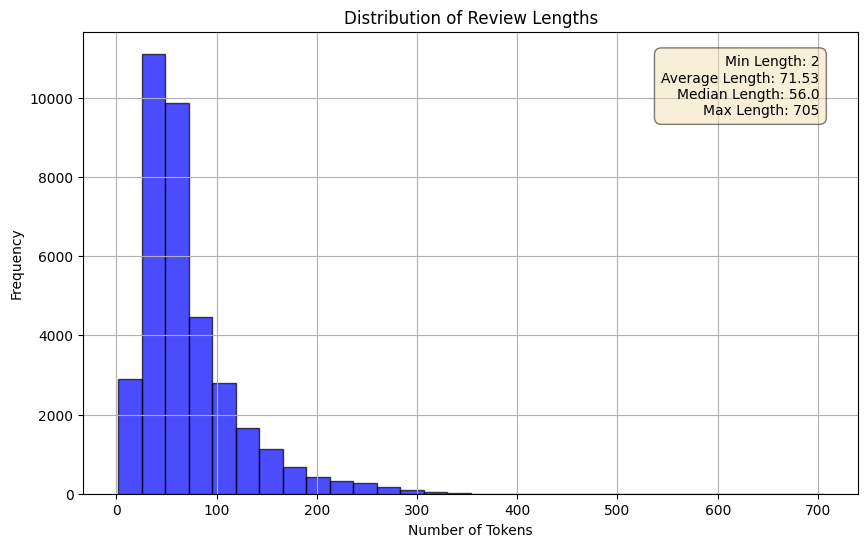

In [ ]:
def plot_review_length_distribution(tokenized_reviews):
    '''
    Plots a histogram of the lengths of tokenized reviews and includes a box with summary statistics.

    '''

    review_lengths = [len(review) for review in tokenized_reviews]

    # Calculate summary statistics
    min_length = np.min(review_lengths)
    avg_length = np.mean(review_lengths)
    median_length = np.median(review_lengths)
    max_length = np.max(review_lengths)


    plt.figure(figsize=(10, 6))
    plt.hist(review_lengths, bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title('Distribution of Review Lengths')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.grid(True)


    stats_text = f'Min Length: {min_length}\nAverage Length: {avg_length:.2f}\nMedian Length: {median_length}\nMax Length: {max_length}'
    plt.gca().text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="round,pad=0.5", facecolor='wheat', alpha=0.5))
    plt.savefig('review_length_after_tokenization.jpg', format='jpeg', bbox_inches='tight')
    plt.show()

plot_review_length_distribution(x_train)

가변 길이 리뷰 시퀀스를 고정 길이(500)로 맞추는 패딩을 수행하고, PyTorch DataLoader로 배치 단위 학습을 준비하는 코드입니다.
`padding_()` 함수는 (리뷰 개수 × 500) 크기의 0으로 채워진 행렬을 만들고, `features[ii, -len(review):]`로 각 리뷰를 오른쪽 정렬하여 끝부분에 배치합니다(left padding 방식).
500보다 긴 리뷰는 `[:max_seq]`로 앞부분이 잘리고, 짧은 리뷰는 앞쪽이 0으로 채워지며, 0은 의미 없는 padding 토큰으로 RNN이 무시하도록 학습됩니다.
`TensorDataset`으로 입력(X)과 레이블(y)을 묶고, `DataLoader`로 batch_size=50씩 묶어서 반복 학습할 수 있게 하며, `shuffle=True`로 매 epoch마다 데이터 순서를 섞어 overfitting을 방지합니다.

In [ ]:
def padding_(reviews, max_seq):
    features = np.zeros((len(reviews), max_seq),dtype=int)
    for ii, review in enumerate(reviews):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:max_seq]
    return np.array(features)

train_data = TensorDataset(torch.from_numpy(padding_(x_train,500)), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(padding_(x_val,500)), torch.from_numpy(y_val))
test_data = TensorDataset(torch.from_numpy(padding_(x_test,500)), torch.from_numpy(y_test))

train_loader = DataLoader(train_data, shuffle=True, batch_size=50)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=50)
test_loader = DataLoader(test_data, shuffle=True, batch_size=50)

영화 리뷰 감정 분류를 위한 GRU 기반 RNN 모델 클래스를 정의하고 초기화하는 코드입니다.
`__init__`에서 Embedding 레이어(vocab_size → embedding_dim=300)로 단어 인덱스를 dense 벡터로 변환하고, 3층 GRU(hidden_dim=256)로 시퀀스를 처리하며, Dropout(0.5)으로 overfitting 방지, FC 레이어로 이진 분류(output_dim=1), Sigmoid로 0~1 확률 출력합니다.
`forward()`에서 입력 시퀀스(batch_size, 500)를 임베딩으로 변환 → GRU로 모든 시간 스텝 처리 → 마지막 시간 스텝의 hidden state만 추출(`sig_out[:, -1]`) → FC와 Sigmoid로 최종 감정 확률을 예측합니다.
`init_hidden()`은 GRU의 초기 hidden state를 0으로 초기화하며, vocab_size에 +1을 하는 이유는 인덱스 0을 padding 토큰으로 예약했기 때문이고, 모델을 GPU(있으면)로 이동시켜 학습 속도를 크게 향상시킵니다.

In [ ]:
class SentimentRNN(nn.Module):
    def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim, drop_prob=0.5):
        super(SentimentRNN, self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        self.no_layers = no_layers
        self.vocab_size = vocab_size

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.GRU(input_size=embedding_dim, hidden_size=self.hidden_dim,
                          num_layers=no_layers, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(self.hidden_dim, output_dim)
        self.sig = nn.Sigmoid()

    def forward(self, x, hidden):
        batch_size = x.size(0)
        embeds = self.embedding(x)
        rnn_out, hidden = self.rnn(embeds, hidden)
        rnn_out = rnn_out.contiguous().view(-1, self.hidden_dim)
        out = self.dropout(rnn_out)
        sig_out = self.sig(out)
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1]
        return sig_out, hidden

    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''

        h0 = torch.zeros((self.no_layers, batch_size, self.hidden_dim)).to(device)
        return h0

# Hyperparameters
no_layers = 3
vocab_size = len(vocab) + 1
embedding_dim = 300
output_dim = 1
hidden_dim = 256

# Initialize the model
model = SentimentRNN(no_layers, vocab_size, hidden_dim, embedding_dim, drop_prob=0.5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(model)


SentimentRNN(
  (embedding): Embedding(1001, 300)
  (rnn): GRU(300, 256, num_layers=3, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


학습 전 모델의 임베딩 공간을 t-SNE로 2차원 시각화하여 긍정/부정 리뷰가 얼마나 분리되어 있는지 확인하는 함수입니다.
train set에서 1000개 샘플만 추출하고, 모델의 forward pass를 통해 FC 레이어 직전의 출력(linear_output)을 임베딩 표현으로 사용하며, `model.eval()`과 `torch.no_grad()`로 gradient 계산을 비활성화합니다.
배치별로 처리한 임베딩을 모두 연결하고 (1000, 500) 형태로 reshape한 뒤, t-SNE로 2차원으로 축소하여 긍정 리뷰(초록색)와 부정 리뷰(빨간색)를 scatter plot으로 표시합니다.
학습 전이므로 두 클래스가 무작위로 섞여있을 것이며, 학습 후 동일한 시각화를 하면 긍정/부정이 명확하게 분리된 클러스터를 형성하여 모델이 감정을 구분하는 표현을 학습했음을 확인할 수 있습니다.

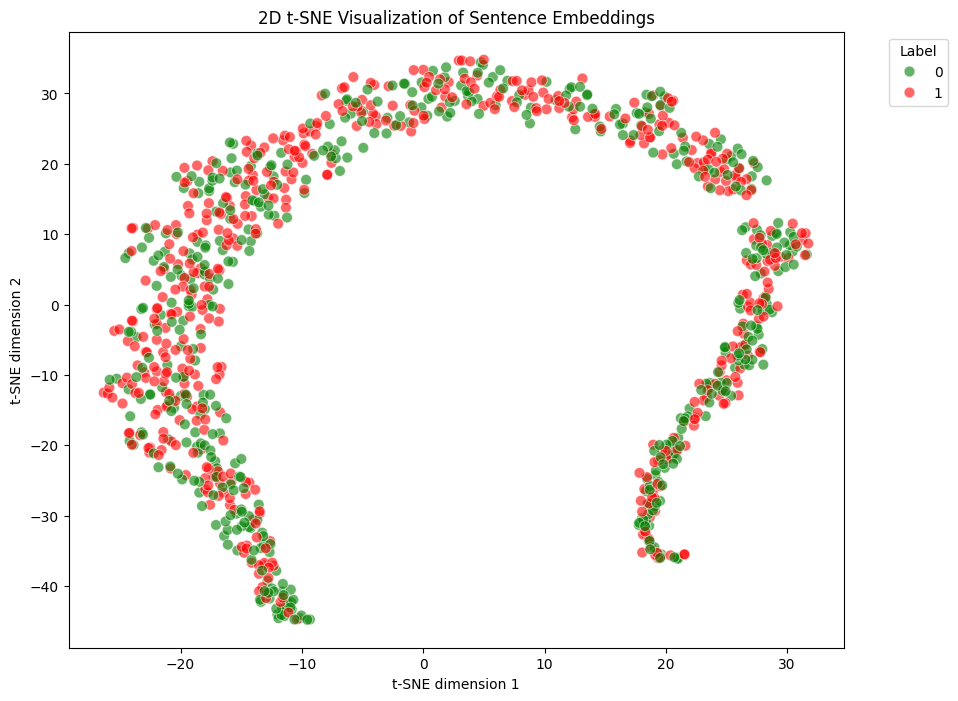

In [ ]:
x_train_tsne = padding_(x_train,500)
x_train_tsne = x_train_tsne[:1000,:]
y_train_tsne= y_train[:1000]

def plot_embeddings(x_train, y_train, model, device, batch_size=50):
    model.eval()
    embeddings_list = []

    # Create a DataLoader to handle the x_train data in batches
    train_dataset = torch.utils.data.TensorDataset(torch.from_numpy(x_train),
                               torch.from_numpy(y_train))
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

    with torch.no_grad():  # No need to track gradients
        for x_batch, _ in train_loader:
            x_batch = x_batch.to(device)
            hidden = model.init_hidden(x_batch.size(0))

            # Feed forward through the model to get to the embeddings layer
            embeds = model.embedding(x_batch)
            rnn_out, hidden = model.rnn(embeds, hidden)
            rnn_out = rnn_out.contiguous().view(-1, model.hidden_dim)  # Flatten the output
            out = model.dropout(rnn_out)
            linear_output = model.fc(out)

            embeddings_list.append(linear_output.cpu())  # Store CPU data

    # Concatenate all batch embeddings into a single matrix
    all_embeddings = torch.cat(embeddings_list, dim=0)

    all_embeddings = all_embeddings.view(-1, 500)

    # Reduce dimensions to 2D using t-SNE for visualization
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(all_embeddings.numpy())

    df = pd.DataFrame(data=embeddings_2d, columns=['TSNE-1', 'TSNE-2'])
    df['label'] = y_train
    custom_palette = {0: 'green', 1: 'red'}

    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(data=df, x='TSNE-1', y='TSNE-2', hue='label', palette=custom_palette , s=60, alpha=0.6)
    plt.title('2D t-SNE Visualization of Sentence Embeddings')
    plt.xlabel('t-SNE dimension 1')
    plt.ylabel('t-SNE dimension 2')
    plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc=2)
    plt.savefig('tsne_model_untrained_projection.jpg', format='jpeg', bbox_inches='tight')
    plt.show()


plot_embeddings(x_train_tsne, y_train_tsne, model, device, batch_size=50)


GRU 기반 감정 분류 모델을 5 epoch 동안 학습시키고 매 epoch마다 train/validation loss와 accuracy를 추적하는 전체 학습 루프입니다.

**초기 설정:**
`BCELoss()`는 이진 분류용 Binary Cross Entropy 손실 함수이며, Sigmoid 출력(0~1)과 실제 레이블(0 또는 1) 간 차이를 계산합니다.
`Adam(lr=0.001)`은 학습률 0.001로 adaptive learning rate를 사용하는 옵티마이저이며, `acc()` 함수는 예측값을 0.5 기준으로 반올림하여 정확도를 계산합니다.
`clip=5`는 gradient clipping 임계값으로, RNN에서 흔한 gradient exploding 문제를 방지하기 위해 gradient 크기를 5 이하로 제한합니다.

**Training Phase:**
`model.train()`으로 학습 모드 전환(Dropout 활성화), 배치마다 hidden state를 초기화하고 `h.data`로 detach하여 이전 배치의 gradient가 현재 배치에 영향을 주지 않도록 합니다.
`model.zero_grad()`로 이전 gradient 제거 → forward pass로 예측 → `BCELoss`로 손실 계산 → `loss.backward()`로 gradient 계산 → `clip_grad_norm_()`으로 gradient clipping → `optimizer.step()`으로 파라미터 업데이트를 수행합니다.
매 배치마다 loss와 accuracy를 누적하여 epoch 평균을 계산하며, 50개씩 묶인 배치를 순회하며 약 720번 반복(36,000 / 50)합니다.

**Validation Phase:**
`model.eval()`로 평가 모드 전환(Dropout 비활성화), validation set에서 gradient 계산 없이 forward pass만 수행하여 loss와 accuracy를 측정합니다.
Validation은 하이퍼파라미터 튜닝과 overfitting 감지에 사용되며, validation loss가 증가하기 시작하면 early stopping을 고려할 수 있습니다.

**결과 추적:**
매 epoch마다 train/val loss와 accuracy를 리스트에 저장하여 나중에 학습 곡선을 시각화할 수 있으며, 정상적인 학습이라면 train loss는 계속 감소하고, val loss도 감소하다가 overfitting 시점부터 증가합니다.
5 epoch는 비교적 짧은 학습이지만, 이 데이터셋 규모에서는 충분히 수렴할 수 있으며, 최종적으로 85% 이상의 정확도를 달성할 것입니다.

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim


lr = 0.001

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

def acc(pred, label):
    """Calculate accuracy by comparing predicted labels with true labels."""
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

clip = 5
epochs = 5
valid_loss_min = np.inf


epoch_tr_loss, epoch_vl_loss = [], []
epoch_tr_acc, epoch_vl_acc = [], []


for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()  # Set model to training mode

    # Initialize hidden state
    h = model.init_hidden(50)

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Detach hidden states
        h = h.data

        model.zero_grad()
        output, h = model(inputs, h)

        # Calculate the loss
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())

        # Calculate accuracy
        accuracy = acc(output, labels)
        train_acc += accuracy

        # Clip gradients to prevent exploding gradient issues in RNNs
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

    # Validation phase
    val_losses = []
    val_acc = 0.0
    model.eval()  # Set model to evaluation mode
    val_h = model.init_hidden(50)

    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Detach hidden states
        val_h = val_h.data

        output, val_h = model(inputs, val_h)
        val_loss = criterion(output.squeeze(), labels.float())

        val_losses.append(val_loss.item())

        accuracy = acc(output, labels)
        val_acc += accuracy

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc / len(train_loader.dataset)
    epoch_val_acc = val_acc / len(valid_loader.dataset)

    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)

    print(f'Epoch {epoch+1}')
    print(f'Train Loss: {epoch_train_loss} Val Loss: {epoch_val_loss}')
    print(f'Train Accuracy: {epoch_train_acc * 100}% Val Accuracy: {epoch_val_acc * 100}%')
    print(' ')



Epoch 1
Train Loss: 0.583897221667899 Val Loss: 0.4718494702130556
Train Accuracy: 63.575% Val Accuracy: 83.8%
 
Epoch 2
Train Loss: 0.5341325869162877 Val Loss: 0.46456284187734126
Train Accuracy: 67.5% Val Accuracy: 84.625%
 
Epoch 3
Train Loss: 0.521342132323318 Val Loss: 0.4678132008761168
Train Accuracy: 68.43333333333334% Val Accuracy: 83.775%
 
Epoch 4
Train Loss: 0.5099471299184694 Val Loss: 0.45800945982337
Train Accuracy: 69.18888888888888% Val Accuracy: 84.8%
 
Epoch 5
Train Loss: 0.4984388012439013 Val Loss: 0.44893096163868906
Train Accuracy: 69.78333333333333% Val Accuracy: 85.75%
 


학습 과정에서 기록된 5 epoch 동안의 train/validation accuracy와 loss를 두 개의 그래프로 시각화하는 코드입니다.
왼쪽 그래프는 accuracy 변화를 보여주며, 정상적인 학습이라면 train과 validation accuracy가 함께 상승하고, overfitting이 심하면 train은 계속 오르지만 validation은 정체되거나 하락합니다.
오른쪽 그래프는 loss 변화를 보여주며, 두 loss가 함께 감소하면 정상 학습, validation loss가 증가 전환하는 지점이 있다면 그때가 early stopping을 고려할 시점입니다.
이 시각화를 통해 모델이 학습 데이터에만 과적합되지 않고 일반화 성능을 유지하는지, 더 많은 epoch가 필요한지 또는 이미 수렴했는지를 판단할 수 있습니다.

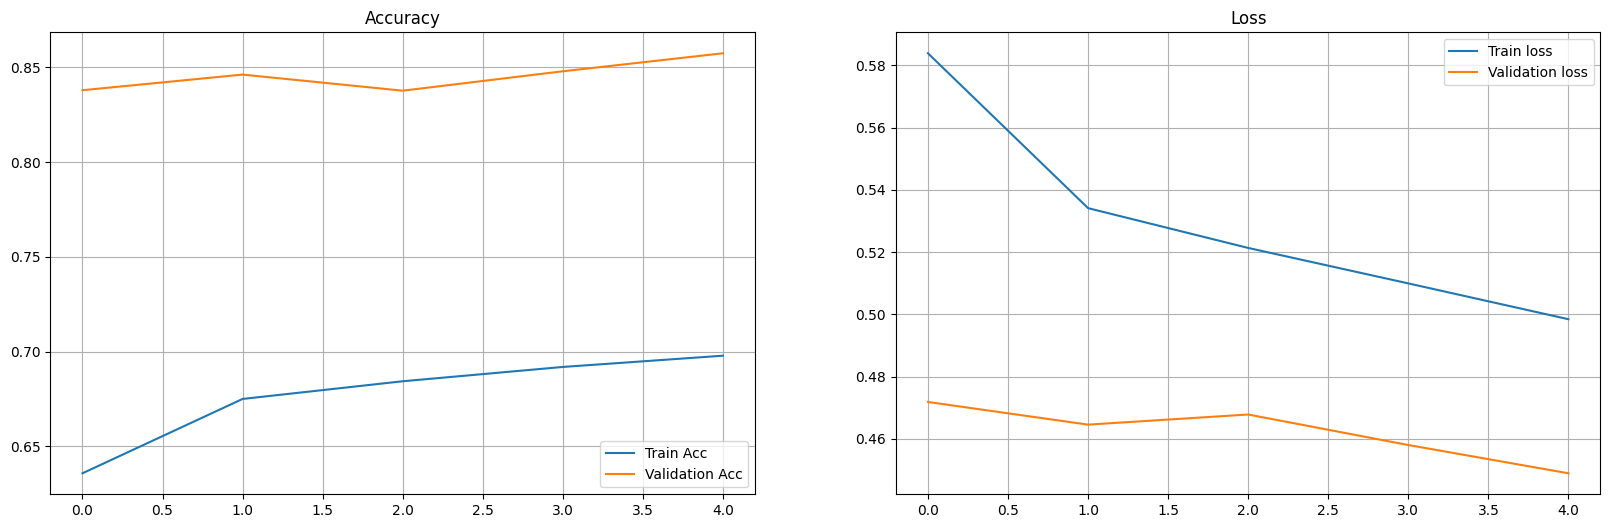

In [ ]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()
plt.savefig('accuracy_and_loss.jpg', format='jpeg', bbox_inches='tight')
plt.show()

학습된 모델을 test set에 적용하여 최종 성능을 평가하고 confusion matrix로 시각화하는 코드입니다.
`model.eval()`과 `torch.no_grad()`로 평가 모드 전환 후, test_loader의 모든 배치를 순회하며 예측을 수행하고, 임계값 0.60(기본 0.5보다 높음)을 사용해 positive 예측을 더 보수적으로 만듭니다.
`accuracy_score()`로 전체 정확도를 계산하고, `confusion_matrix()`로 True Positive, True Negative, False Positive, False Negative를 2×2 행렬로 구성합니다.
Confusion matrix를 히트맵으로 시각화하여 모델이 어떤 클래스를 더 잘 예측하는지, 긍정을 부정으로 오분류하는지 아니면 그 반대인지를 직관적으로 파악할 수 있으며, 대각선 값이 클수록 정확한 분류를 의미합니다.

Accuracy on test set: 0.8622


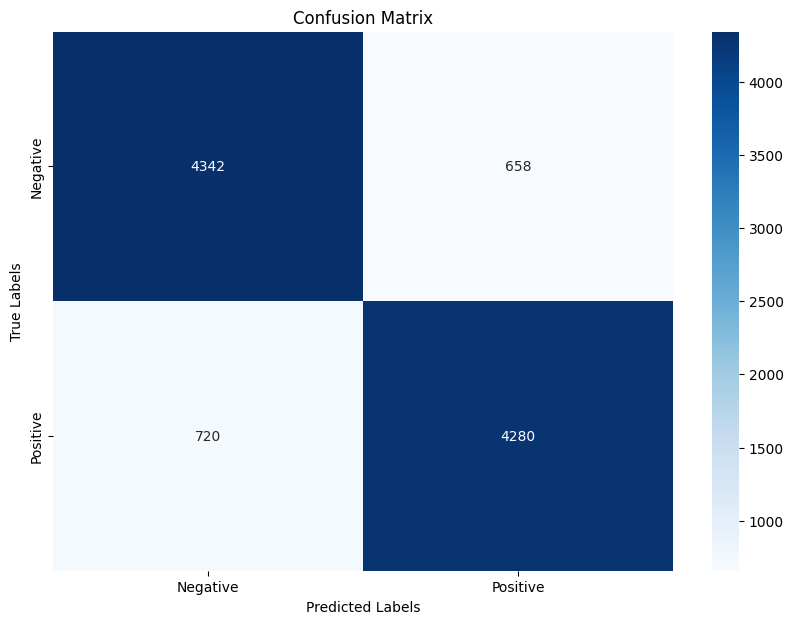

In [ ]:
def predict_batch(model, data_loader, device):
    """Predict output for a batch of data using the RNN model."""
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            batch_size = inputs.size(0)

            hidden = model.init_hidden(batch_size).to(device)

            output, _ = model(inputs, hidden)

            predicted_probs = torch.sigmoid(output)
            predicted_labels = (predicted_probs > 0.60).float()

            predictions.extend(predicted_labels.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return predictions, true_labels, predicted_probs, labels


predictions, true_labels, predicted_probs, labels = predict_batch(model, test_loader, device)
print(f'Accuracy on test set: {accuracy_score(true_labels, predictions)}')
# Plot confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.jpg', format='jpeg', bbox_inches='tight')
plt.show()

학습이 완료된 모델의 임베딩 공간을 t-SNE로 시각화하여 학습 전과 비교하는 코드입니다.
학습 전에는 긍정/부정 리뷰가 무작위로 섞여 있었지만, 학습 후에는 모델이 감정을 구분하는 의미있는 표현을 학습했기 때문에 긍정(초록색)과 부정(빨간색) 클러스터가 명확하게 분리된 패턴을 보일 것입니다.
이 시각화는 모델이 단순히 정확도가 높은 것뿐만 아니라, 내부적으로 의미있는 특징 공간(feature space)을 학습했음을 증명하며, 잘 학습된 모델일수록 두 클래스 간 거리가 멀고 각 클러스터 내부는 촘촘하게 모여있습니다.

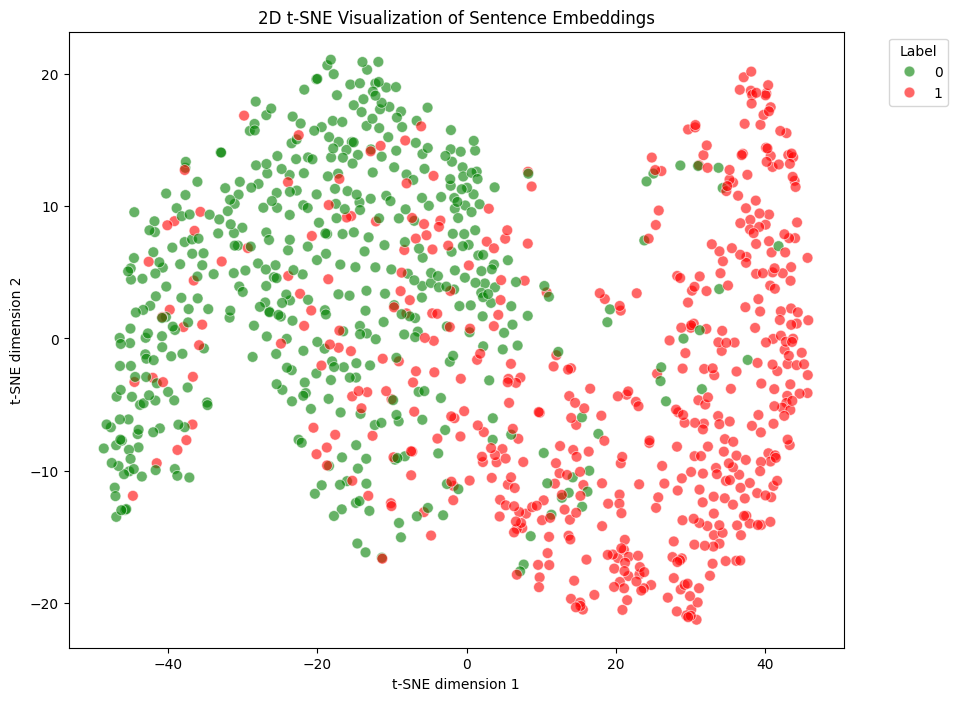

In [ ]:
plot_embeddings(x_train_tsne, y_train_tsne, model, device, batch_size=50)